# <span style="color:purple"> Labo 11 - Herhalingslabo

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn import datasets, linear_model


pd.set_option('display.max_columns', 500)

 ## <span style="color:darkorange"> Discrete kansverdelingen

Het aantal fouten in een galsvezelkabel volgt een Poisson kansverdeling. Veronderstel dat het gemiddeld aantal fouten in 50 meter kabel 1,2 bedraagt.

a. Wat is de kans dat er exact 3 fouten in 150 meter glasvezelkabel zitten? 

In [2]:
stats.poisson.pmf(3,3.6)

0.21246926575014694

b. Wat is de kans dat er minstens twee fouten in 100 meter galsvezelkabel zitten?

In [3]:
1-stats.poisson.cdf(2,2.4)

0.4302912533424894

c. Wat is de kans dat er in 200 meter kabel minder dan 2 fouten zitten?

In [4]:
stats.poisson.cdf(1,4.8)

0.04773253288431617

d. Een glasvezelkabel is 100 meter lang. Wat is de kans dat er in de eerste 50 meter exact 1 fout zit en exact 1 fout in de tweede 50 meter?

In [5]:
g=stats.poisson.pmf(1,1.2)
answer =g*g
answer

0.13063385273675404

De bus van 8u30 is 30% van de keren te laat. Beantwoord onderstaande vragen

a. Wat is de kans dat de bus de volgende week (= 7 dagen) nooit te laat zal zijn? Welke kansverdeling zal je hiervoor hanteren?

In [6]:
stats.binom.pmf(0,7,0.3)


0.08235429999999996

b. Wat is de kans dat de bus meer dan 4 van de zeven dagen te laat zal  zijn?

In [7]:
stats.binom.sf(4,7,0.3)

0.02879549999999999

c. Wat is de kans dat de komende maand (= 30 dagen) de bus exact 10 dagen te laat zal zijn? 

In [8]:
stats.binom.pmf(10,30,0.3)

0.14156170106200108

d. Wat is de kans dat de komende maand de bus minder dan 7 dagen te laat zal zijn? 

In [9]:
stats.binom.cdf(6,30,0.3)

0.15952298219587446

Bepaal het aantal dagen per maand waarvoor er minder dan 10 procent kans bestaat dat de bus er meer dan dit aantal te laat zal zijn.

In [10]:
stats.binom.ppf(0.9,30,0.3)

12.0

 ## <span style="color:darkorange"> Normaalverdeling

De levensduur van een toestel is normaal verdeeld met een gemiddelde van 12 maanden en een standaardafwijking van 2 maanden. 

a. Bepaal de kans dat het toestel binnen de 7 maanden stuk gaat. 

In [11]:
stats.norm.cdf(7,12,2)

0.006209665325776132

b. Bepaal de kans dat het toestel langer dan 15 maanden meegaat.

In [12]:
stats.norm.sf(15,12,2)

0.06680720126885807

c. Bepaal de kans dat het toestel tijdens de 10de maand stuk gaat.

In [13]:
stats.norm.pdf(10,12,2)

0.12098536225957168

d. Binnen hoeveel tijd gaan de 10% minst duurzame toestellen stuk?

In [14]:
stats.norm.isf(0.90,12,2)

9.4368968689108

 ## <span style="color:darkorange"> Data cleaning en regressie

De dataset autos.csv bevat gegevens gegevens van tweedehands auto's die op Ebay worden verkocht.
Werk onderstaande vragen uit.

In [15]:
df= pd.read_csv('autos.csv', sep=',', header=0, encoding='cp1252')
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [16]:
# Hoveel rijen bevat de dataset?
df.shape


(371528, 20)

Verwijder de volgende kolommen: 'dateCrawled', 'offerType', 'seller', 'monthOfRegistration', 'notRepairedDamage', 'nrOfPictures', 'postalCode', 'lastSeen', 'dateCreated'

In [17]:
# Verwijderen van de kolom seller
df = df.drop(['dateCrawled', 'offerType', 'seller', 'monthOfRegistration', 'notRepairedDamage', 'nrOfPictures', 'postalCode', 'lastSeen', 'dateCreated'],axis=1)

In [18]:
df.shape

(371528, 11)

Geef een overzicht van hoeveel ontbrekende waarden er in elke kolom van de dataset voorkomen.

In [19]:
# Aantal ontbrekende waarden
df.isnull().sum()

name                      0
price                     0
abtest                    0
vehicleType           37869
yearOfRegistration        0
gearbox               20209
powerPS                   0
model                 20484
kilometer                 0
fuelType              33386
brand                     0
dtype: int64

Verwijder alle rijen met ontbrekende waarden (listwise deletion)

In [20]:
# Verwijder alle rijen met ontbrekende waarden (listwise deletion)
df.dropna(inplace=True)


In [21]:
df.shape

(299864, 11)

In [22]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer
count,2.998640e+05,299864.000000,299864.000000,299864.000000
mean,8.537011e+03,2002.934464,123.536687,125309.406931
std,4.196486e+05,6.579942,172.038444,39346.956439
min,0.000000e+00,1910.000000,0.000000,5000.000000
25%,1.400000e+03,1999.000000,75.000000,100000.000000
50%,3.500000e+03,2003.000000,114.000000,150000.000000
75%,7.999000e+03,2007.000000,150.000000,150000.000000
max,1.000000e+08,2018.000000,20000.000000,150000.000000


Verwijder alle rijen waarbij de numerieke waarden gelijk zijn aan 0.
Verwijder alle rijen waarbij het aantal pk (powerPS) kleiner is dan 10

In [23]:
# Verwijderen van onrealistische waarden
df = df[df.price>0]
df = df[df.powerPS>0]


In [24]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer
count,2.793390e+05,279339.000000,279339.000000,279339.000000
mean,8.633288e+03,2003.184435,130.701925,124788.464912
std,3.914672e+05,6.475801,172.613325,39453.217809
min,1.000000e+00,1910.000000,1.000000,5000.000000
25%,1.500000e+03,1999.000000,82.000000,100000.000000
50%,3.750000e+03,2004.000000,116.000000,150000.000000
75%,8.499000e+03,2008.000000,151.000000,150000.000000
max,1.000000e+08,2018.000000,20000.000000,150000.000000


Verwijder in de kolommen 'price' en powerPS alle uitschieters. Beschouw uitschieters hier als de waarden die meer dan 10 standaardafwijkingen van het gemiddelde zijn gelegen.

In [25]:
# Verwijderen van uitschieters
price_std = df['price'].std()
price_avg = df['price'].mean()

power_std = df['powerPS'].std()
power_avg = df['powerPS'].mean()

# df = df[(df['price']>(price_avg-10*price_std) & (df['price']<(price_avg+10*price_std)))]
# df = df[(df['powerPS']>(power_avg-10*power_std) & (df['powerPS']<(power_avg+10*power_std)))]

print(price_std)
print(price_avg)
print(power_std)
print(power_avg)


391467.1704806122
8633.288169571739
172.61332514992415
130.70192490128483


In [26]:
df = df[((df['price'])>(price_avg-10*price_std) )]
df = df[((df['powerPS'])>(power_avg-10*power_std))]

df = df[(df['price'] < (price_avg+10*price_std))]
df = df[(df['powerPS'] < (power_avg+10*power_std))]


In [27]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer
count,2.792390e+05,279239.000000,279239.000000,279239.000000
mean,6.626034e+03,2003.185064,128.445317,124791.146652
std,1.169612e+04,6.475561,66.816918,39448.537191
min,1.000000e+00,1910.000000,1.000000,5000.000000
25%,1.500000e+03,1999.000000,82.000000,100000.000000
50%,3.750000e+03,2004.000000,116.000000,150000.000000
75%,8.499000e+03,2008.000000,151.000000,150000.000000
max,1.250000e+06,2018.000000,1800.000000,150000.000000


Teken een histogram van de prijs (price). Bepaal op voorhand het aantal klasses en geef dit aantal mee met de bin parameter van de functie sns.distplot().

In [28]:

def get_bins(df, kolom):
    rang = df[kolom].max()-df[kolom].min()
    bins = (rang/(np.sqrt(df[kolom].count())))
    bins = np.arange(df[kolom].min(), df[kolom].max(), bins)
    return bins


def distplot(df, kolom):
    bns = get_bins(df, kolom)
    sns.distplot(x=df[kolom], bins=bns, kde=False)
    plt.title(f'Grafiek van {kolom}')


c:\Users\timbl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


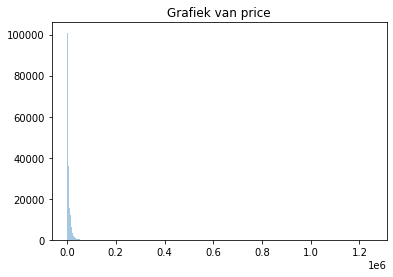

In [29]:
# Histogram van de prijs
distplot(df,'price')


Stel grafisch de verdeling van 'fuel_Type'weer. Gebruik sns.countplot(). Wat is het populairste brandstoftype?

<AxesSubplot:xlabel='fuelType', ylabel='count'>

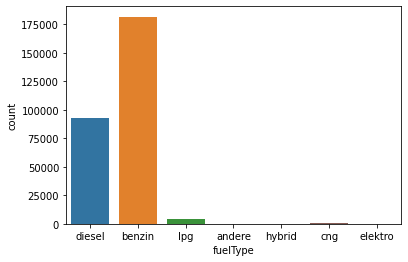

In [30]:
# Verdeling van fuelType

sns.countplot(data=df,x='fuelType')

Stel grafisch de verdeling van 'gearbox' weer. Wat is de populairste transmissie?

<AxesSubplot:xlabel='gearbox', ylabel='count'>

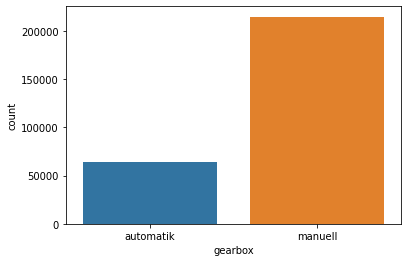

In [31]:
# Verdeling van gearbox

sns.countplot(data=df,x='gearbox')

Controleer of auto's met een automatische versnellingbak duurder zijn dan deze met een manuele versnellingsbak. Gebruik hiervoor een boxplot. Wat zijn de conclusies?

<AxesSubplot:xlabel='price', ylabel='gearbox'>

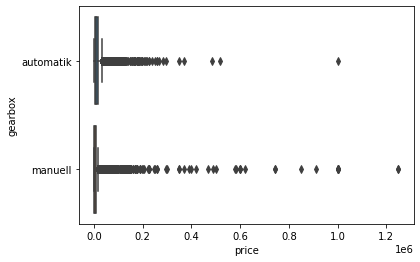

In [34]:
# Boxplot van de prijs per type versnellingsbak.

sns.boxplot(data=df,x='price',y='gearbox')

Wat is het populairste automerk en wat is het populairste model van dat merk?

In [51]:
# Populairste merk
print(f"Het populairste merk is {df['brand'].value_counts().index[0]}")

# Populairste model
df2 = df[df['brand']=="volkswagen"]
print(f"Het populairste model is {df2['model'].value_counts().index[0]}")

Het populairste merk is volkswagen
Het populairste model is golf


Voeg een extra kolom toe aan de dataset met daarin de leeftijd van de auto's. Deze leeftijd kan je berekenen als (2018 - yearOfRegistration)

In [52]:
# Invoegen van de leeftijd
df['age'] = (2018 - df['yearOfRegistration'])
df

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,age
2,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,automatik,163,grand,125000,diesel,jeep,14
3,GOLF_4_1_4__3TÜRER,1500,test,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,17
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,10
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,manuell,102,3er,150000,benzin,bmw,23
6,Peugeot_206_CC_110_Platinum,2200,test,cabrio,2004,manuell,109,2_reihe,150000,benzin,peugeot,14
...,...,...,...,...,...,...,...,...,...,...,...,...
371520,turbo_defekt,3200,control,limousine,2004,manuell,225,leon,150000,benzin,seat,14
371524,Smart_smart_leistungssteigerung_100ps,1199,test,cabrio,2000,automatik,101,fortwo,125000,benzin,smart,18
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,test,bus,1996,manuell,102,transporter,150000,diesel,volkswagen,22
371526,VW_Golf_Kombi_1_9l_TDI,3400,test,kombi,2002,manuell,100,golf,150000,diesel,volkswagen,16


Welke variabele lijkt het meeste invloed te hebben op de prijs? De leeftijd of het kilometeraantal?
Baseer je op de correlatiecoëfficiënt.

<AxesSubplot:>

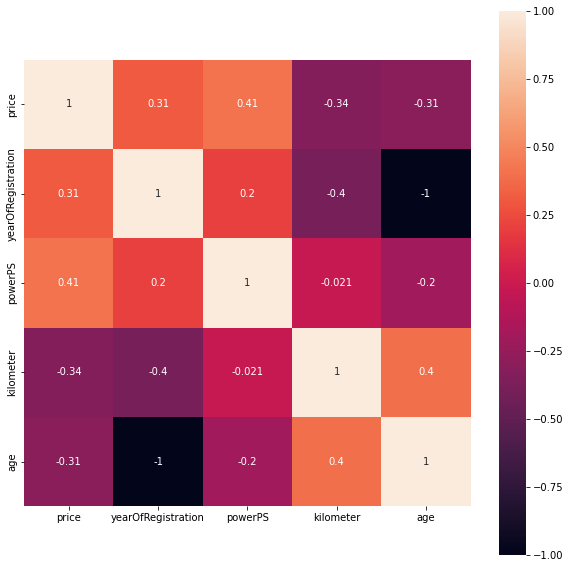

In [54]:
# Correlatie
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=corr,square=True, annot=True)

Iemand wil een auto kopen van 2014 of jonger. Deze auto mag maximaal 50000 km op de teller staan hebben. Toon de auto's die aan deze eisen voldoen.

In [55]:
# auto's van 2014 of jonger en max 50000 km op de teller
df4 = df[(df['kilometer']<50000)&(df['yearOfRegistration']>=2014)]
df4

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,age
8,Ford_C___Max_Titanium_1_0_L_EcoBoost,14500,control,bus,2014,manuell,125,c_max,30000,benzin,ford,4
56,BMW_435i_Sport_coupe,39600,test,coupe,2014,automatik,306,andere,30000,benzin,bmw,4
148,Mercedes_Benz_GLK_250_BlueTEC_4Matic_Standhzg_...,41900,control,suv,2014,automatik,204,glk,40000,diesel,mercedes_benz,4
184,Skoda_Fabia_Combi_1.2_TSI_DSG_Style,16449,control,kombi,2015,automatik,110,fabia,10000,benzin,skoda,3
275,Audi_A6_3.0_TDI_competition_S_Line_LED_BOSE,56900,control,limousine,2015,automatik,326,a6,5000,diesel,audi,3
...,...,...,...,...,...,...,...,...,...,...,...,...
371321,Volkswagen_Touran_1.4_TSI_BlueMotion_Technolog...,28500,test,bus,2016,manuell,150,touran,5000,benzin,volkswagen,2
371328,Audi_A1_1.4_TFSI_S_tronic,19990,control,kleinwagen,2014,automatik,185,a1,10000,benzin,audi,4
371334,MINI_Cooper_Cabrio__noch_1_Jahr_Werksgarantie_,23490,test,cabrio,2015,manuell,122,cooper,20000,benzin,mini,3
371365,Mazda_CX_5_SKYACTIV_D_175_Drive_AWD_Sports_Line,32900,test,suv,2015,automatik,175,cx_reihe,10000,diesel,mazda,3


Maak een nieuw dataframe met volkswagen golf met een leeftijd van 4 jaar

Teken op basis van dit dataframe een scatterplot met op de x-as het vermogen van de auto en op de y-as de prijs van de auto.

Bepaal vervolgens de regressielijn tussen het vermogen en de prijs.

Voorspel wat een volkswagen golf van 4 jaar oud met een vermogen van 120pk naar verwachting zou kosten.

Bepaal vervolgens de determinatiecoëfficiënt (R²-waarde) van dit regressiemodel.

In [61]:
from sklearn.linear_model import LinearRegression

def find_regressionline(dataset: pd.DataFrame, x: str, y: str) -> LinearRegression:
    onafhankelijke_variabele = dataset[x].values
    afhankelijke_variabele = dataset[y].values

    regressionline = LinearRegression()
    regressionline.fit(onafhankelijke_variabele.reshape(-1,1), afhankelijke_variabele)

    return regressionline

def find_regressionline_voorwaarde(dataset: pd.DataFrame,xwaarde,ywaarde, x: str, y: str) -> LinearRegression:
    onafhankelijke_variabele = dataset[xwaarde][x].values
    afhankelijke_variabele = dataset[ywaarde][y].values

    regressionline = LinearRegression()
    regressionline.fit(onafhankelijke_variabele.reshape(-1,1), afhankelijke_variabele)

    return regressionline

def plot_regressionline_voorwaarde(dataset: pd.DataFrame,xwaarde,ywaarde, x: str, y:str, regressielijn: LinearRegression, title:str) -> None:
    plt.figure()
    sns.scatterplot(x=dataset[xwaarde][x], y=dataset[ywaarde][y], data=dataset,color='orange',s=100)
    sns.lineplot(dataset[xwaarde][x],regressielijn.predict(dataset[xwaarde][x].values.reshape(-1,1)),color='violet',linewidth=3)
    sns.set_style("darkgrid")
    plt.title(title)
    plt.show()

def plot_regressionline(dataset: pd.DataFrame, x: str, y:str, regressielijn: LinearRegression, title:str) -> None:
    plt.figure()
    sns.scatterplot(x=dataset[x], y=dataset[y], data=dataset,color='orange',s=100)
    sns.lineplot(dataset[x],regressielijn.predict(dataset[x].values.reshape(-1,1)),color='violet',linewidth=3)
    sns.set_style("darkgrid")
    plt.title(title)
    plt.show()


c:\Users\timbl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


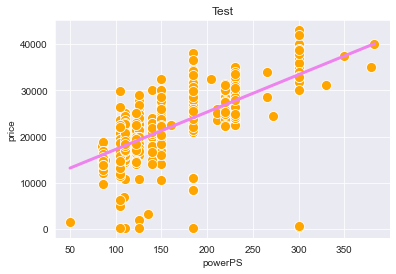

In [63]:
# Nieuw dataframe met volkswagen golf met een leeftijd van 4 jaar
df_end = df[(df['brand']=='volkswagen')&(df['model']=='golf')&(df['age']<=4)]

# Scatterplot
line = find_regressionline(dataset=df_end,x='powerPS',y='price')
plot_regressionline(dataset=df_end,x='powerPS',y='price',regressielijn=line,title="Test")




In [67]:
# Voorspel de prijs van een volkswagen golf van 4 jaar oud met 120pk

x_value= np.array([[12]])
damage = line.predict(x_value)

print('De prijs is: ',damage[0])

De prijs is:  10116.301197375262


array([10116.30119738])

In [83]:
from sklearn.metrics import r2_score
l=[]
for i in df_end['powerPS']:
    i= np.array([[i]])
    damage = line.predict(i)
    l.append(damage)
t = df_end.price.tolist()

r2 = r2_score(t, l)
print(r2)

0.47765782161790094
